In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Canarias_Stages_Times_Sec.csv με (737, 7)
Δημιουργήθηκε dataframe για το Czech Barum_Stages_Times_Sec.csv με (1214, 7)
Δημιουργήθηκε dataframe για το Hungary_Stages_Times_Sec.csv με (410, 7)
Δημιουργήθηκε dataframe για το Latvia_Stages_Times_Sec.csv με (499, 7)
Δημιουργήθηκε dataframe για το Poland_Stages_Times_Sec.csv με (840, 7)
Δημιουργήθηκε dataframe για το Portugal_Stages_Times_Sec.csv με (676, 7)
Δημιουργήθηκε dataframe για το Roma Capitale_Stages_Times_Sec.csv με (1092, 7)
Δημιουργήθηκε dataframe για το Scandinavia_Stages_Times_Sec.csv με (671, 7)


In [2]:
min_value = total.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race        ss          
Canarias    1       99.8
            2      535.7
            3      366.0
            4      673.7
            5      526.4
...                  ...
Scandinavia 12     284.8
            13     279.6
            14     256.2
            15     320.6
            16     279.8

[106 rows x 1 columns]

In [3]:
total_ss_times_F = total.merge(min_value2, on=['Race', 'ss'])
total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.
0,1,Paddon Ha,RC2,1,Canarias,1,99.8,99.8,Canarias_01
1,24,Nucita An,RC2,1,Canarias,2,100.2,99.8,Canarias_01
2,18,Wagner Si,RC2,1,Canarias,3,100.5,99.8,Canarias_01
3,17,Mareš Fil,RC2,1,Canarias,4,101.0,99.8,Canarias_01
4,39,Pernía S.,RC2,1,Canarias,5,101.1,99.8,Canarias_01
...,...,...,...,...,...,...,...,...,...
6134,41,Andersson,RC4,16,Scandinavia,32,338.2,279.8,Scandinavia_16
6135,48,Åkesson J,RC2,16,Scandinavia,33,350.1,279.8,Scandinavia_16
6136,46,Kreuter N,RC4,16,Scandinavia,34,352.6,279.8,Scandinavia_16
6137,38,Spitalier,RC4,16,Scandinavia,35,365.2,279.8,Scandinavia_16


In [4]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,1,Paddon Ha,RC2,1,Canarias,1,99.8,99.8,Canarias_01,0.0,0.000000
1,24,Nucita An,RC2,1,Canarias,2,100.2,99.8,Canarias_01,0.4,0.400802
2,18,Wagner Si,RC2,1,Canarias,3,100.5,99.8,Canarias_01,0.7,0.701403
3,17,Mareš Fil,RC2,1,Canarias,4,101.0,99.8,Canarias_01,1.2,1.202405
4,39,Pernía S.,RC2,1,Canarias,5,101.1,99.8,Canarias_01,1.3,1.302605
...,...,...,...,...,...,...,...,...,...,...,...
6134,41,Andersson,RC4,16,Scandinavia,32,338.2,279.8,Scandinavia_16,58.4,20.872051
6135,48,Åkesson J,RC2,16,Scandinavia,33,350.1,279.8,Scandinavia_16,70.3,25.125089
6136,46,Kreuter N,RC4,16,Scandinavia,34,352.6,279.8,Scandinavia_16,72.8,26.018585
6137,38,Spitalier,RC4,16,Scandinavia,35,365.2,279.8,Scandinavia_16,85.4,30.521801


In [5]:
total_ss_times_WRC = total_ss_times_F[total_ss_times_F['Group'].str.contains('RC2')]
total_ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,1,Paddon Ha,RC2,1,Canarias,1,99.8,99.8,Canarias_01,0.0,0.000000
1,24,Nucita An,RC2,1,Canarias,2,100.2,99.8,Canarias_01,0.4,0.400802
2,18,Wagner Si,RC2,1,Canarias,3,100.5,99.8,Canarias_01,0.7,0.701403
3,17,Mareš Fil,RC2,1,Canarias,4,101.0,99.8,Canarias_01,1.2,1.202405
4,39,Pernía S.,RC2,1,Canarias,5,101.1,99.8,Canarias_01,1.3,1.302605
...,...,...,...,...,...,...,...,...,...,...,...
6120,25,Al-Rashed,RC2,16,Scandinavia,18,314.4,279.8,Scandinavia_16,34.6,12.365976
6121,12,László Ma,RC2,16,Scandinavia,19,314.6,279.8,Scandinavia_16,34.8,12.437455
6129,21,Somaschini,RC2,16,Scandinavia,27,324.7,279.8,Scandinavia_16,44.9,16.047177
6131,20,Cuzma Bog,RC2,16,Scandinavia,29,329.8,279.8,Scandinavia_16,50.0,17.869907


In [6]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_WRC, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)
total_ss_times_F4

Crew                        Al-Rashed   Allen  Phi  Almeida  P  Andolfi  F  \
Race        SS.                                                              
Canarias    Canarias_01            NaN       600.0         NaN         NaN   
            Canarias_02            NaN         NaN         NaN         NaN   
            Canarias_03            NaN         NaN         NaN         NaN   
            Canarias_04            NaN         NaN         NaN         NaN   
            Canarias_05            NaN         NaN         NaN         NaN   
...                                ...         ...         ...         ...   
Scandinavia Scandinavia_12        33.7         NaN         NaN         NaN   
            Scandinavia_13        26.4         NaN         NaN         NaN   
            Scandinavia_14        27.2         NaN         NaN         NaN   
            Scandinavia_15        26.8         NaN         NaN         NaN   
            Scandinavia_16        34.6         NaN         NaN         NaN   

Crew                        Angelucci   Aragno  F.  Araújo  Ar  Ares  Iván  \
Race        SS.                                                              
Canarias    Canarias_01            NaN         NaN         NaN         3.2   
            Canarias_02            NaN         NaN         NaN        20.1   
            Canarias_03            NaN         NaN         NaN         5.6   
            Canarias_04            NaN         NaN         NaN        10.9   
            Canarias_05            NaN         NaN         NaN         7.7   
...                                ...         ...         ...         ...   
Scandinavia Scandinavia_12         NaN         NaN         NaN         NaN   
            Scandinavia_13         NaN         NaN         NaN         NaN   
            Scandinavia_14         NaN         NaN         NaN         NaN   
            Scandinavia_15         NaN         NaN         NaN         NaN   
            Scandinavia_16         NaN         NaN         NaN         NaN   

Crew                        Armstrong   Avbelj  Bo  ...  Wagner  Si  \
Race        SS.                                     ...               
Canarias    Canarias_01            NaN         NaN  ...         0.7   
            Canarias_02            NaN         NaN  ...        24.3   
            Canarias_03            NaN         NaN  ...        11.9   
            Canarias_04            NaN         NaN  ...        19.0   
            Canarias_05            NaN         NaN  ...         6.2   
...                                ...         ...  ...         ...   
Scandinavia Scandinavia_12        12.3         NaN  ...         NaN   
            Scandinavia_13        13.0         NaN  ...         NaN   
            Scandinavia_14        10.7         NaN  ...         NaN   
            Scandinavia_15        10.7         NaN  ...         NaN   
            Scandinavia_16        10.3         NaN  ...         NaN   

Crew                        Windisch    Zakmans  I  Zaldivar    Zedník  Pe  \
Race        SS.                                                              
Canarias    Canarias_01            NaN         NaN         NaN         NaN   
            Canarias_02            NaN         NaN         NaN         NaN   
            Canarias_03            NaN         NaN         NaN         NaN   
            Canarias_04            NaN         NaN         NaN         NaN   
            Canarias_05            NaN         NaN         NaN         NaN   
...                                ...         ...         ...         ...   
Scandinavia Scandinavia_12         NaN         NaN         NaN         NaN   
            Scandinavia_13         NaN         NaN         NaN         NaN   
            Scandinavia_14         NaN         NaN         NaN         NaN   
            Scandinavia_15         NaN         NaN         NaN         NaN   
            Scandinavia_16         NaN         NaN         NaN         NaN   

Crew                        von

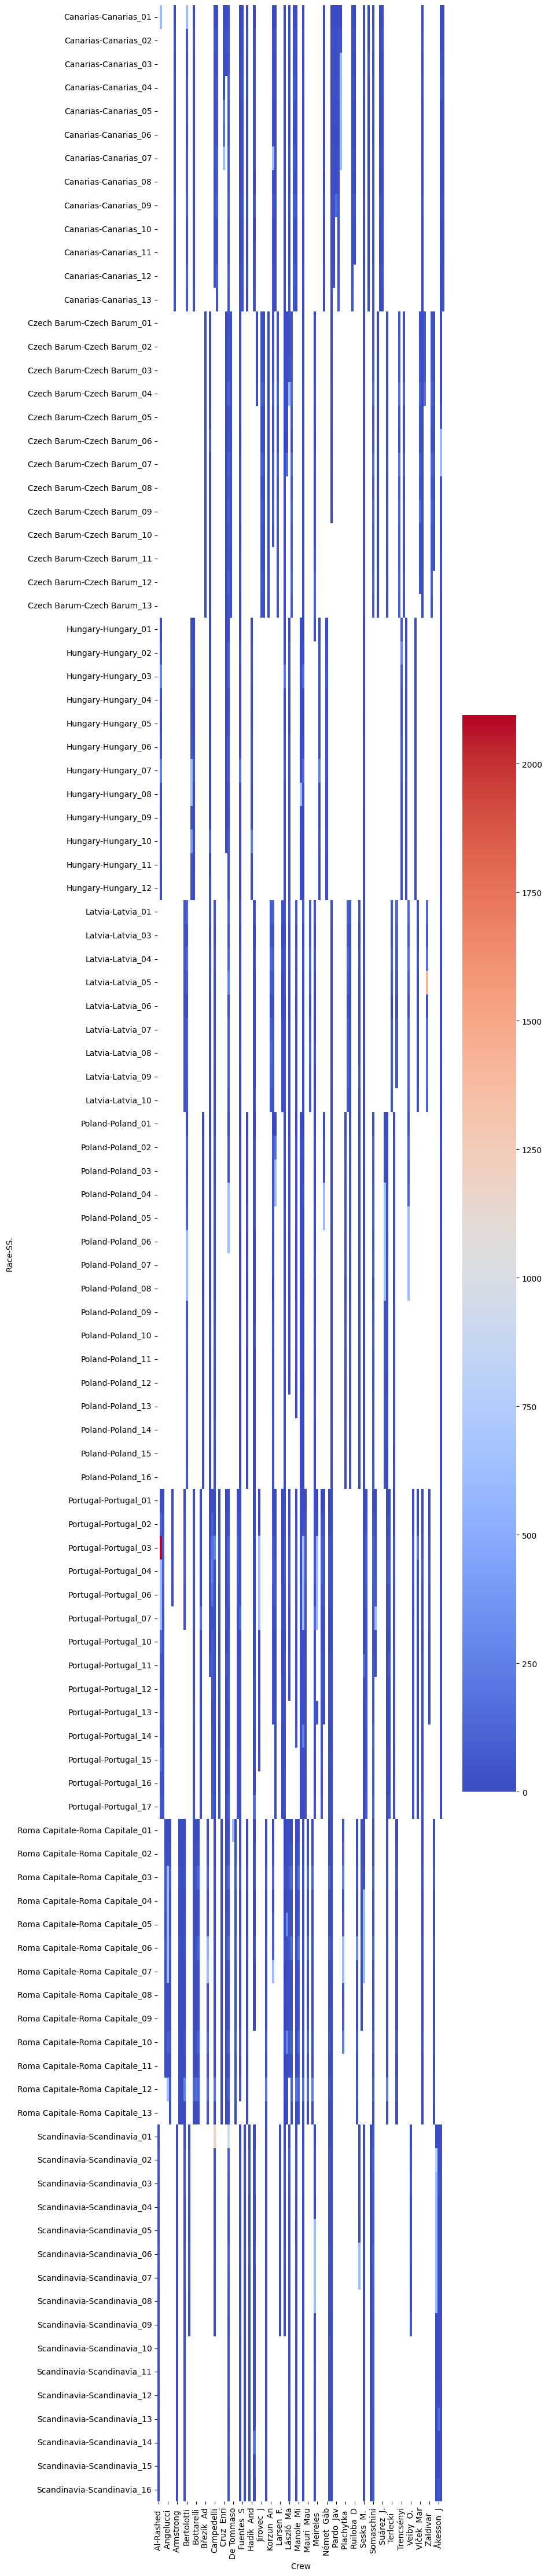

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(8,56)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc2.jpg")
plt.show()